In [1]:
from sklearn.datasets import load_diabetes

# 당뇨병 환자 데이터
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target

print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [6]:
# 가중치 초기화
w = 1.0
b = 1.0
y_hat = x[0] * w + b

print('예측 데이터 :', y_hat)
print('실제 데이터 :', y[0])


예측 데이터 : 1.0616962065186832
실제 데이터 : 151.0


In [7]:
# 가중치 값을 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b

print('변경된 예측값 :', y_hat_inc)


변경된 예측값 : 1.0678658271705517


In [8]:
# 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print('증가 정도 :', w_rate)

증가 정도 : 0.06169620651868429


In [9]:
150 * 0.06

9.0

In [10]:
# 변화율로 가중치 업데이트
err = y[0] - y_hat
w_new = w + w_rate * err
print(w_new)

10.250624555903848


In [11]:
# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print('절편 변화율 :', b_rate)

절편 변화율 : 1.0


In [13]:
err = y[0] - y_hat
b_new = b + b_rate * err
print(b_new)

150.9383037934813


In [20]:
x[3] * w_new + b_new

150.81944765306812

In [19]:
y[3]

206.0

In [28]:
w = 1
b = 1
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    b_rate = 1
    w = w + w_rate * err
    b = b + b_rate * err
print(w, b)


587.8654539985616 99.4093556453094


In [32]:
w * x[2] + b

125.54068835421108

In [33]:
y[2]

141.0

In [29]:
x[0]

0.061696206518683294

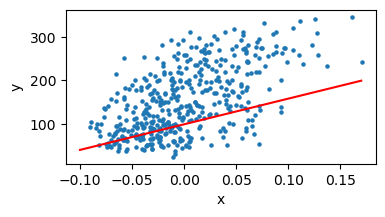

In [40]:
import matplotlib.pyplot as plt
# 예측선 그리기
plt.figure(figsize=(4,2))
plt.scatter(x, y, s = 5)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [56]:
# 에포크를 반복하기
w = 1.0
b = 1.0
for i in range(1000):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err

In [57]:
print(w, b)

942.7013592249233 151.74608061033564


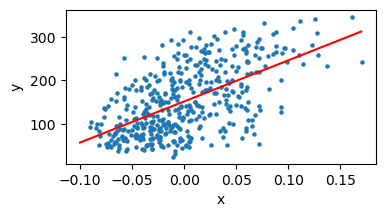

In [54]:
plt.figure(figsize=(4,2))
plt.scatter(x, y, s = 5)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

pred = x * w + b

In [47]:
mean_squared_error(y, pred)

4719.312052729014

In [86]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter = 15000, alpha=0, shuffle=False)

sgd.fit(x.reshape(-1,1), y)

SGDRegressor(alpha=0, max_iter=15000, shuffle=False)

In [87]:
sgd.coef_, sgd.intercept_ 

(array([904.29769952]), array([152.18959269]))

In [85]:
print(w, b)

942.7013592249233 151.74608061033564


In [91]:
import numpy as np

-1 * np.log(0.8) 

0.2231435513142097

In [93]:
-1 * np.log(0.1)

2.3025850929940455

In [95]:
np.random.rand(1)

array([0.01253442])

In [97]:
# 뉴런 구조를 클래스로 생성
class Neuron:
    # 기본 가중치 생성
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    
    # 정방향 계산 함수
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    # 역방향 오차 가중치 업데이트
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    # 훈련을 위한 fit() 메서드 구현
    def fit(self, x, y, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

In [98]:
neuron = Neuron()

In [99]:
neuron.fit(x, y)

In [101]:
neuron.w, neuron.b

(913.5973364346786, 123.39414383177173)

In [ ]:
def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

In [107]:
pred = neuron.forpass(x)

In [102]:
def predict(class_, x):
    pred = class_.w * x + class_.b
    return pred

In [104]:
pred = predict(neuron, x)

In [105]:
mean_squared_error(y, pred)

4719.312052729014